In [37]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :		
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	# Function for model training	
	def fit( self, X, Y ) :		
		# no_of_training_examples, no_of_features		
		self.m, self.n = X.shape	
		#print(self.n)	
		# weight initialization		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :	
		#A = h(x) which 1/1+e to the z which is wx+b	
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
		
		# calculate gradients
		#print(self.Y.shape)
		# h(x) - Y transpose 	predicted - actual	
		tmp = ( A - self.Y.T)
		#print(tmp)		
		tmp = np.reshape( tmp, self.m )		
		#print(tmp)	dw = X*W / dimension of the dimension of X
		dW = np.dot( self.X.T, tmp ) / self.m
		#change in y intercept of the logstic 		
		db = np.sum( tmp ) / self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :	
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
		#if statement Y is 1 if Z is greater 0.5		
		Y = np.where( Z > 0.5, 1, 0 )		
		return Y




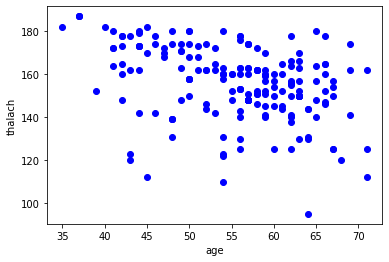

Accuracy: 0.5384615384615384
Parameters (w's):  [[-1.76496874e+167]
 [-9.74020394e+168]
 [-2.64739230e+167]
 [-2.78180321e+169]]


In [38]:
def plot_data(x, y):
  plt.xlabel('age')
  plt.ylabel('thalach')

  plt.plot(x, y, 'bo')
  plt.show() 

def linearRegFun(x, w):
  return np.matmul(x, w)

def cost_function(x, y, w):
  return ((linearRegFun(x, w)- y).T@(linearRegFun(x, w)- y)/ 2*y.shape[0])

def gradient_descent(x, y, w, learning_rate = 0.1, num_epochs = 10):
  m = x.shape[0]

  J_all = []

  for i in range(num_epochs):
    h_x = linearRegFun(x, w)

    cost = (1/m)*(x.T@(h_x - y))

    w = w - (learning_rate)*cost

    J_all.append(cost_function(x, y, w))
  
  return w, J_all

df = pd.read_csv('ModifiedHeartDisease.csv')


plot_data(df['age'].values,df['thalach'].values)

X = df[['age', 'cp', 'thalach']].values
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogitRegression(learning_rate = 0.01, iterations = 1000)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


y = np.reshape(y, (195, 1))

features = np.hstack((np.ones((X.shape[0],1)),X))

w_s = np.zeros((features.shape[1],1))

learning_rate = 0.1

num_epochs =50

w_s, J_all = gradient_descent(features, y, w_s, learning_rate, num_epochs)
print("Parameters (w's): ", w_s)
